In [1]:
## Ev fiyatı tahmini yapacağız.
## Kütüphaneleri import edelim.
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv('Housing.csv')

In [15]:
## Genel olarak verimize bakalım.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
## String olan ve fiyatı etkileyen değerleri int'a çevirelim.
def str_to_int(st):
    if(st=='yes'):
        return 1
    else:
        return 0
donusturulecekler = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for i in donusturulecekler:
    df[i] = df[i].apply(str_to_int)

In [26]:
## Fiyatı etkileyen Furnishingstatus içinde bir fonksiyon yazalım.
def str_to_int2(st):
    if(st=='furnished'):
        return 1
    elif(st=='semi-furnished'):
        return 0.5
    else:
        return 0
df['furnishingstatus'] = df['furnishingstatus'].apply(str_to_int2)

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [30]:
# Şimdi bir linear regresyon modeli oluşturalım.
X = df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y = df['price']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [32]:
# Nesnemizi oluşturup verilerimizi aktaralım.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)

LinearRegression()

In [34]:
#Modelimizle tahmin yapalım.
pred = lm.predict(X_test)

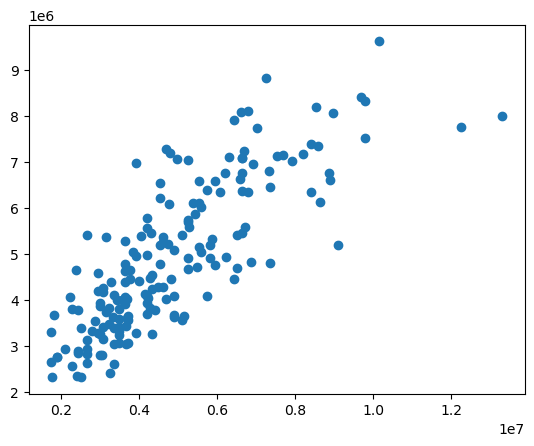

In [35]:
#Sonuçlarımıza bakalım.
plt.scatter(y_test,pred)

In [36]:
#Şimdi modelimizi değerlendirelim.
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,pred)
MSE = metrics.mean_squared_error(pred,y_test)
RMSE = np.sqrt(MSE)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MAE:  906953.7908301714
MSE:  1475542475754.5503
RMSE:  1214719.0933522657


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

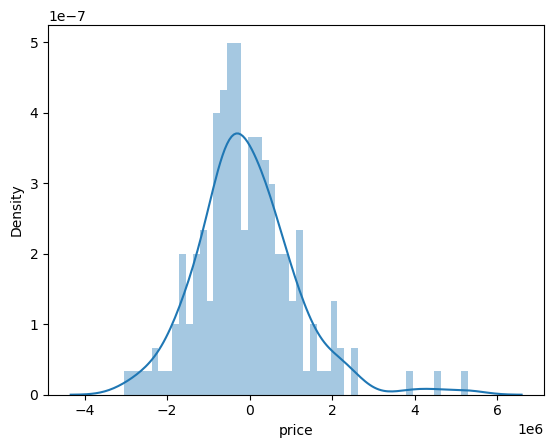

In [38]:
#Gauss dağılımına uyuyor mu diye kontrol edelim.
sns.distplot((y_test-pred),bins=50)

In [39]:
#Hangi değerler evin fiyatını ne kadar etkiliyor diye kontrol edelim.
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
area,2.513402e+02
bedrooms,9.271661e+04
bathrooms,1.126479e+06
stories,3.962484e+05
mainroad,4.106352e+05
guestroom,3.204967e+05
basement,4.846223e+05
hotwaterheating,6.230474e+05
airconditioning,6.783753e+05
parking,2.924105e+05
